In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("agirlcoding/all-space-missions-from-1957")

print("Path to dataset files:", path)

100%|██████████| 101k/101k [00:00<00:00, 36.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/agirlcoding/all-space-missions-from-1957/versions/6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Space Exploration.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company Name,0
Location,0
Datum,0
Detail,0
Status Rocket,0
Rocket,3360
Status Mission,0


In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
df['Company Name'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [ ]:
df['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [ ]:
df.shape

(4324, 7)

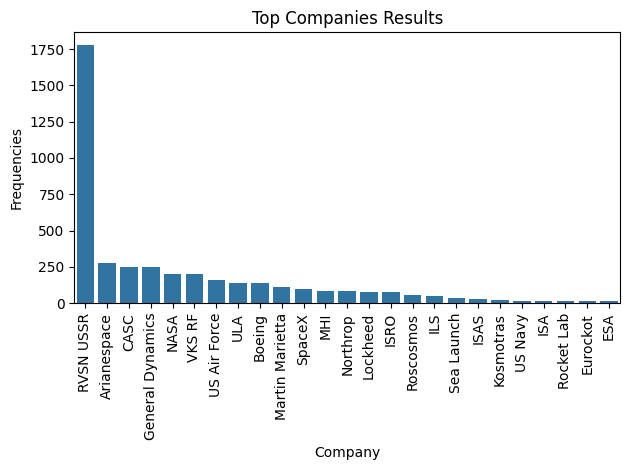

In [ ]:
top_comps = df["Company Name"].value_counts(ascending=False).reset_index()[:25]
top_comps

sns.barplot(x='Company Name', y='count', data=top_comps)
plt.title('Top Companies Results')  # Add a title
plt.xlabel('Company')   # Replace with appropriate label
plt.ylabel('Frequencies')   # Replace with appropriate label
plt.xticks(rotation=90)      # Optional: Rotate x-axis labels for better readability

# Step 5: Display the plot
plt.tight_layout()
plt.show()

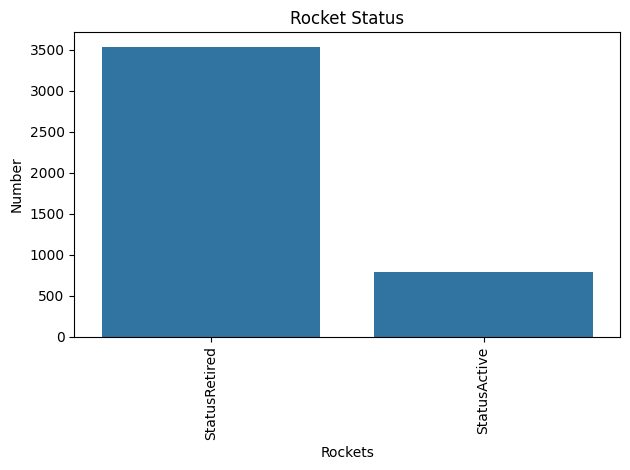

In [ ]:
status = df["Status Rocket"].value_counts(ascending=False).reset_index()[:25]
status

sns.barplot(x='Status Rocket', y='count', data=status)
plt.title('Rocket Status')  # Add a title
plt.xlabel('Rockets')   # Replace with appropriate label
plt.ylabel('Number')   # Replace with appropriate label
plt.xticks(rotation=90)      # Optional: Rotate x-axis labels for better readability

# Step 5: Display the plot
plt.tight_layout()
plt.show()

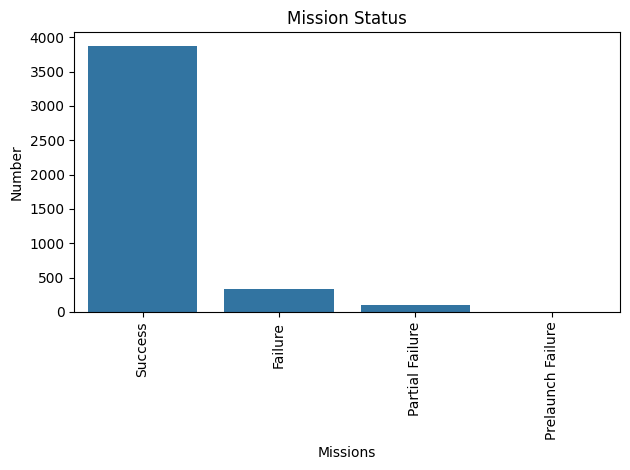

In [ ]:
mission=df['Status Mission'].value_counts(ascending=False).reset_index()[:25]
mission

sns.barplot(x='Status Mission', y='count', data=mission)
plt.title('Mission Status')  # Add a title
plt.xlabel('Missions')   # Replace with appropriate label
plt.ylabel('Number')   # Replace with appropriate label
plt.xticks(rotation=90)      # Optional: Rotate x-axis labels for better readability

# Step 5: Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df2=df.dropna(subset=[' Rocket'])
len(df2)

964

In [ ]:
df2.loc[:, ' Rocket'].unique()

array(['50.0 ', '29.75 ', '65.0 ', '145.0 ', '64.68 ', '48.5 ', '90.0 ',
       '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ', '12.0 ',
       '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ', '41.8 ',
       '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ', '350.0 ',
       '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ', '123.0 ',
       '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ', '140.0 ',
       '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ', '190.0 ',
       '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ', '59.0 ',
       '63.23 '], dtype=object)

In [ ]:
df2.loc[:, " Rocket"] = df2.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df2.loc[:, " Rocket"] = df2.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

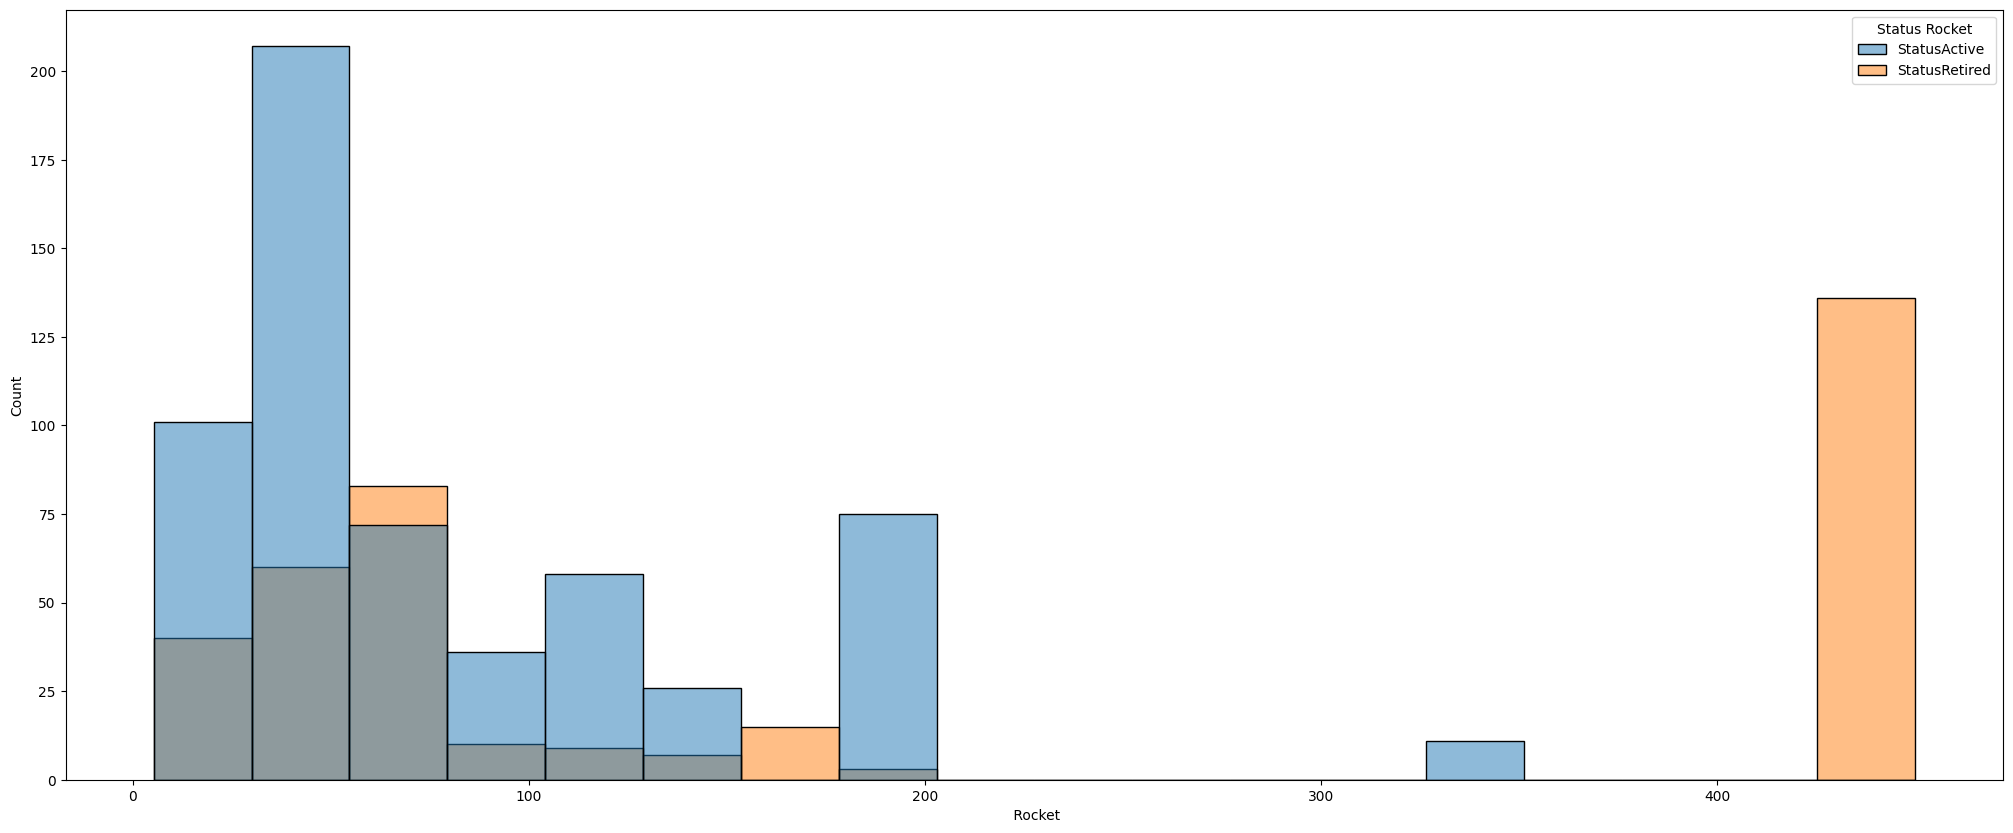

In [ ]:
df2=df2[df2[' Rocket']<1000]
df2
plt.figure(figsize=(25,10))
sns.histplot(data=df2, x=' Rocket', hue='Status Rocket')
plt.show()

<Axes: xlabel=' Rocket', ylabel='Count'>

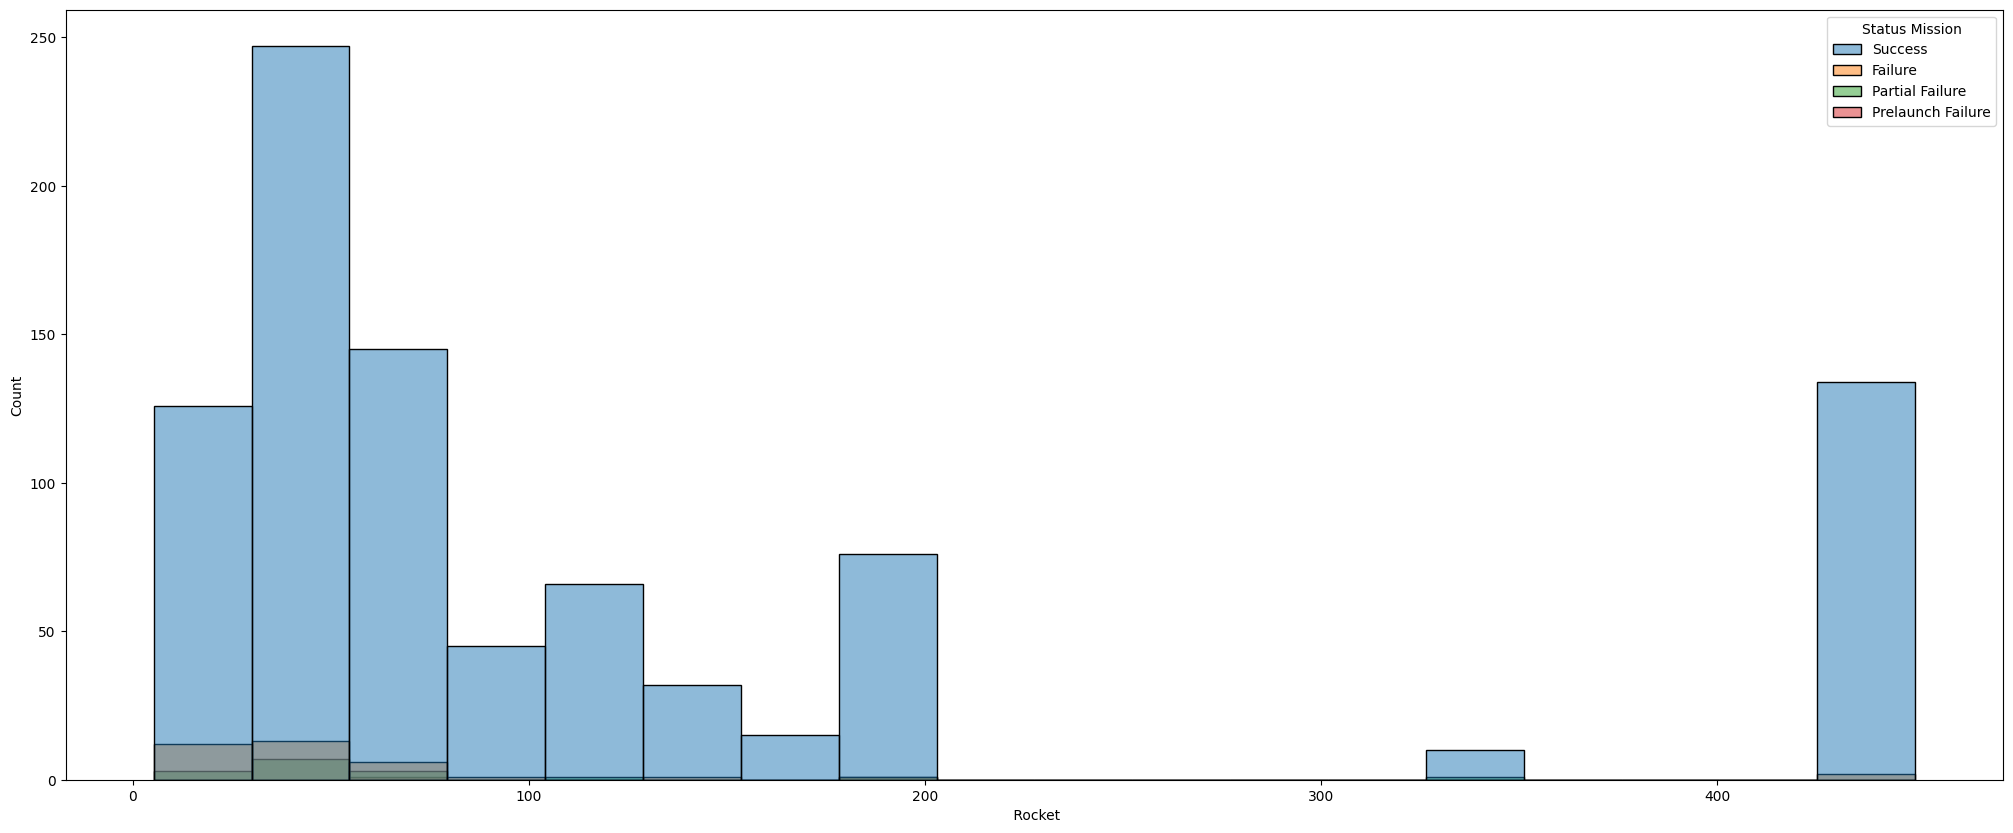

In [ ]:
plt.figure(figsize=(25,10))
sns.histplot(data = df2, x = ' Rocket', hue = 'Status Mission')

In [ ]:
df2_money = df2.groupby(['Company Name'])[' Rocket'].sum().reset_index()
df2_money = df2_money[df2_money[' Rocket']>0]

df2_money = df2_money.sort_values(by=' Rocket', ascending=False)[:15]

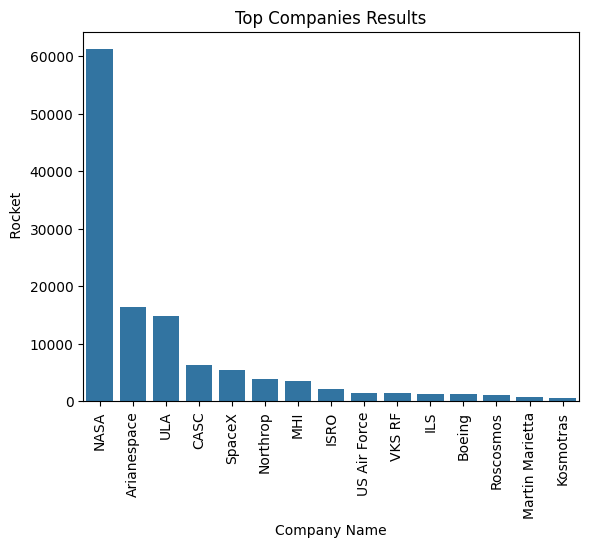

In [ ]:
sns.barplot(x='Company Name', y=' Rocket', data=df2_money.sort_values(by=' Rocket', ascending=False)[:25])
plt.title('Top Companies Results')  # Add a title
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns


Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['Datum'], errors = 'coerce')

df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [ ]:
from datetime import datetime

df['year'] = df['date'].dt.year

df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0


In [ ]:
year_count = df['year'].value_counts().reset_index()
year_count

,year,count
0,2018.0,117
1,1971.0,116
2,1975.0,112
3,1976.0,109
4,1977.0,109
...,...,...
59,2010.0,36
60,2012.0,34
61,1958.0,22
62,1959.0,20


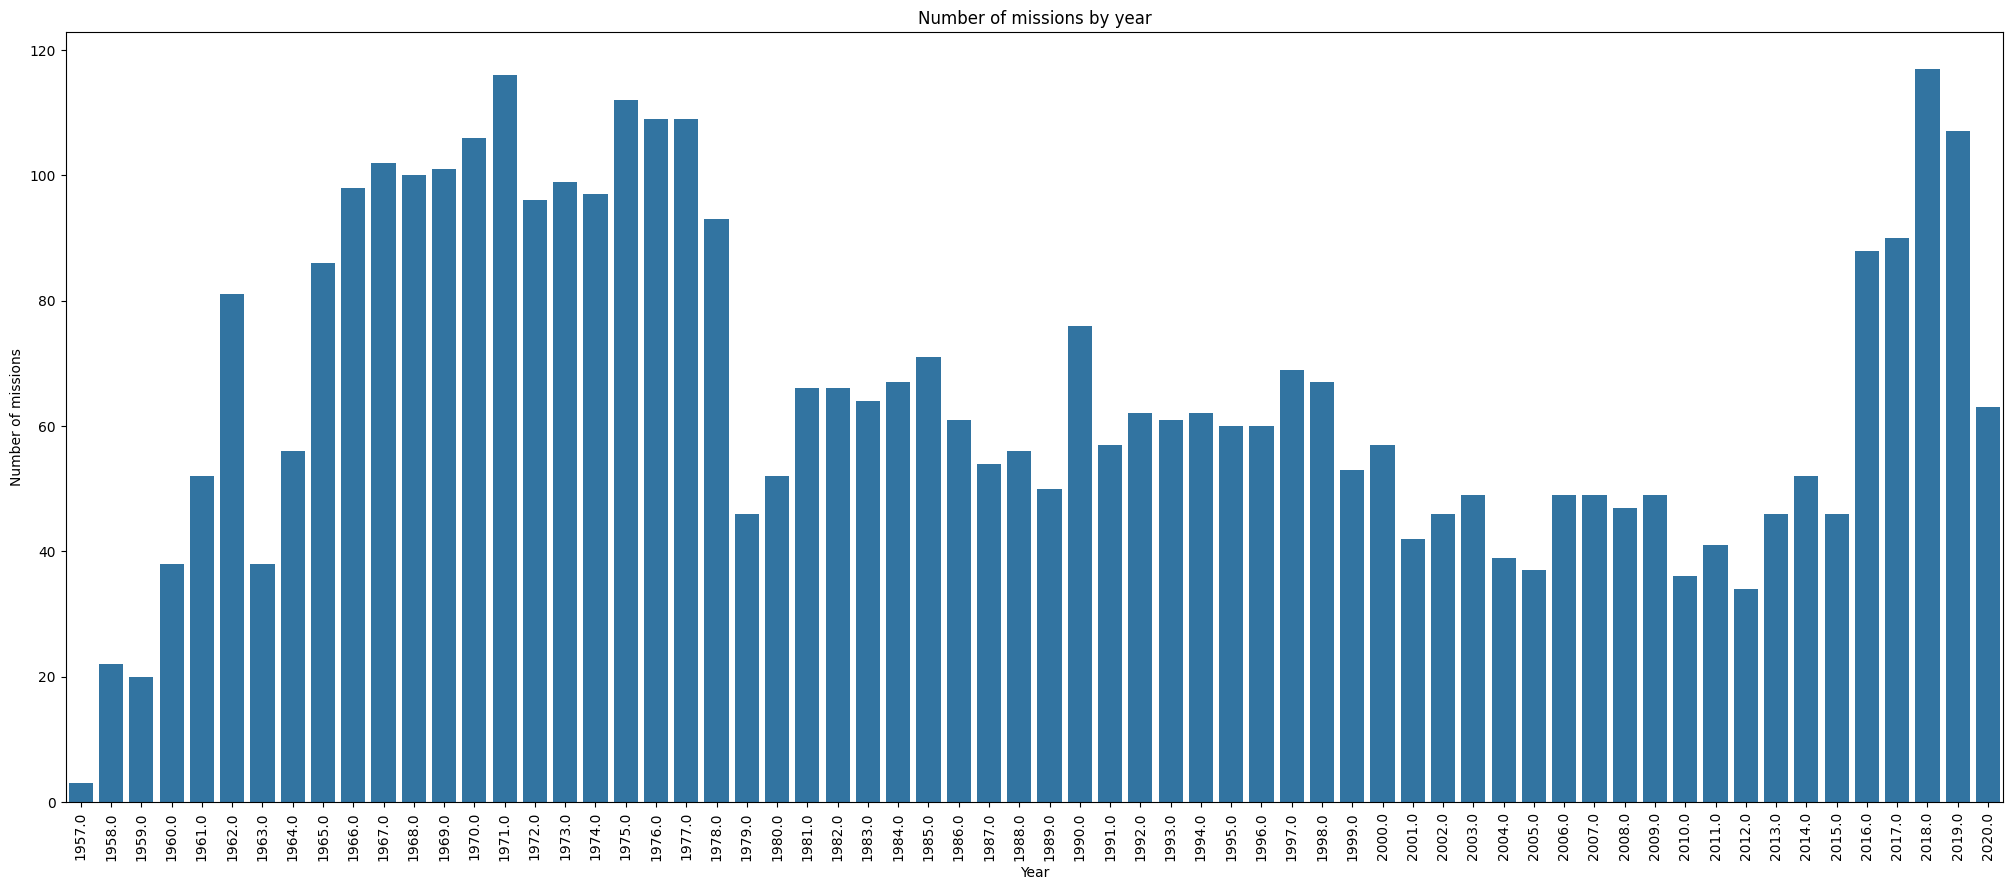

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(data=year_count, x='year', y= 'count')
plt.title('Number of missions by year')
plt.xlabel('Year')
plt.ylabel('Number of missions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Status Mission'].unique()

(16,)


In [ ]:
encoder = LabelEncoder()
encoder.fit(df['Status Mission'])


LabelEncoder()

In [ ]:
plt.figure(figsize=(30,10))
for i, country in enumerate(df['country'].unique()):

  counts = df[df['country']==country]